In [39]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection, preprocessing, cluster, metrics, mixture
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

In [149]:
df = pd.read_csv('data/snsdata.csv', sep=',')
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
df.drop(['gradyear', 'age', 'gender', 'friends'], axis=1, inplace=True)

In [151]:
df.shape

(30000, 36)

In [152]:
col = list(df.columns)
ss = preprocessing.StandardScaler().fit(df)
df_scaled = ss.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=col)

In [153]:
df_scaled.iloc[0].iloc[0].round(2)

-0.33

In [154]:
km = cluster.KMeans(n_clusters=9, n_init=10, random_state=42).fit(df_scaled)
predictions = km.predict(df_scaled)
print(f'получившееся значение инерции: {round(km.inertia_, 2)}')

получившееся значение инерции: 857169.1


In [155]:
df['cluster'] = predictions
df.cluster.value_counts()

cluster
0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
Name: count, dtype: int64

In [156]:
def get_inertia(cluster_num, X):
    km = cluster.KMeans(n_clusters=cluster_num, random_state=42, n_init=10).fit(X)
    inertia = km.inertia_
    return inertia
res = {'inertia':[], 'cluster':[]}
for cluster_num in range(3, 10):
    res['inertia'].append(get_inertia(cluster_num, df_scaled))
    res['cluster'].append(cluster_num)
res_df = pd.DataFrame(res)

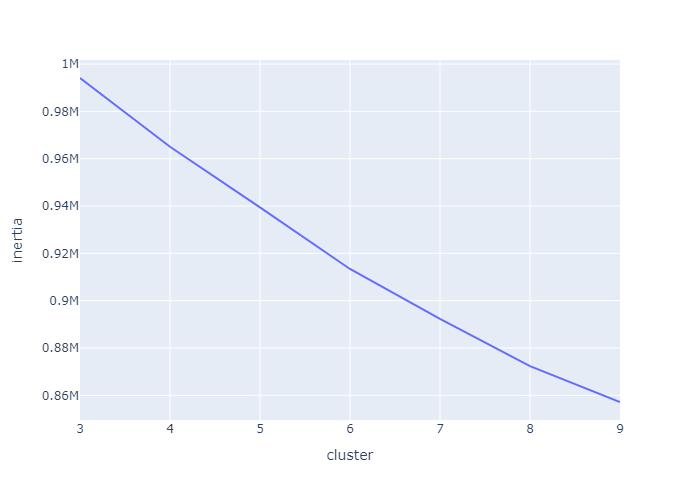

In [157]:
fig = px.line(res_df, x='cluster', y='inertia')
fig.show('png')

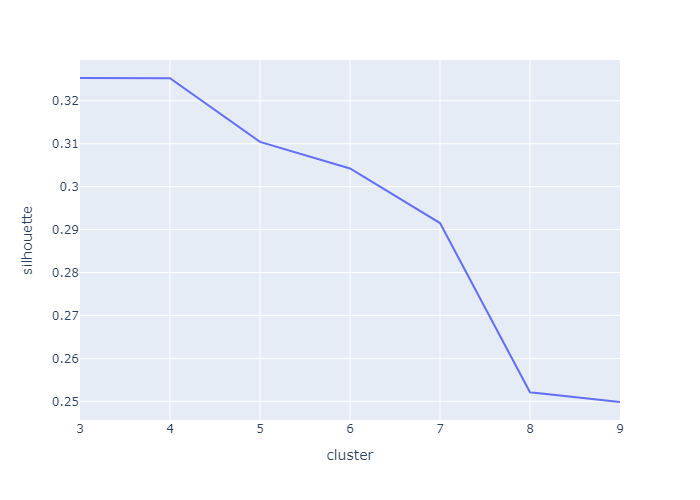

In [158]:
def get_silhouette(cluster_num, X):
    k_means =  cluster.KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42).fit(X)
    silhouette = metrics.silhouette_score(X, k_means.predict(X))
    return silhouette

silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(3, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, df_scaled))
    silhouette_res["cluster"].append(cluster_num)

silhouette_df = pd.DataFrame(silhouette_res)

fig = px.line(silhouette_df, x='cluster', y='silhouette')
fig.show('png')

In [168]:
km = cluster.KMeans(n_clusters=3, n_init=10, random_state=42).fit(df_scaled)
predictions = km.predict(df_scaled)

df['cluster'] = predictions

In [169]:
df.mean().sort_values(ascending=False)[:5]

cluster    1.566467
music      0.737833
god        0.465300
dance      0.425167
hair       0.422567
dtype: float64

In [170]:
top_list = []
df_sum = df.groupby('cluster').mean()
for i, num in df.groupby('cluster'):
    a = num.drop('cluster', axis=1).mean().sort_values(ascending=False)
    top_list.append(set(a[0:10].index))
set.intersection(*top_list)

{'dance', 'god', 'hair', 'music'}

In [171]:
top_list = []
for label, group in df.groupby('cluster'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    top_5 = set(means.head(10).index)
    top_list.append(top_5)

set.intersection(*top_list)

{'dance', 'god', 'hair', 'music'}

In [181]:
em = mixture.GaussianMixture(n_components=3, random_state=42).fit(df)
df['cluster_em'] = em.predict(df)
df.cluster_em.value_counts()

cluster_em
0    20525
1     9474
2        1
Name: count, dtype: int64

In [182]:
model = mixture.GaussianMixture(n_components=3, random_state=42)
predictions = model.fit_predict(df)
np.unique(predictions, return_counts=True)

(array([0, 1, 2], dtype=int64), array([20525,  9474,     1], dtype=int64))

In [187]:
df[df['cluster_em']==2].value_counts().sort_values()

basketball  football  soccer  softball  volleyball  swimming  cheerleading  baseball  tennis  sports  cute  sex  sexy  hot  kissed  dance  band  marching  music  rock  god  church  jesus  bible  hair  dress  blonde  mall  shopping  clothes  hollister  abercrombie  die  death  drunk  drugs  cluster  cluster_em
0           2         0       0         0           1         0             0         0       0       1     22   1     0    0       1      1     0         0      1     10   0       1      0      12    2      327     0     0         1        0          0            6    6      6      0      1        2             1
Name: count, dtype: int64

## DBSCAN

## Практика

In [3]:
df = pd.read_csv('data\CC GENERAL.csv', sep=',')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean(), inplace=True)
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean(), inplace=True)
df.MINIMUM_PAYMENTS.mean().round(2)

864.21

In [6]:
col = list(df.drop('CUST_ID', axis=1).columns)
ss = preprocessing.StandardScaler().fit(df.drop('CUST_ID', axis=1))
df_scaled = ss.transform(df.drop('CUST_ID', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=col)
df_scaled.iloc[0].iloc[0].round(2)

-0.73

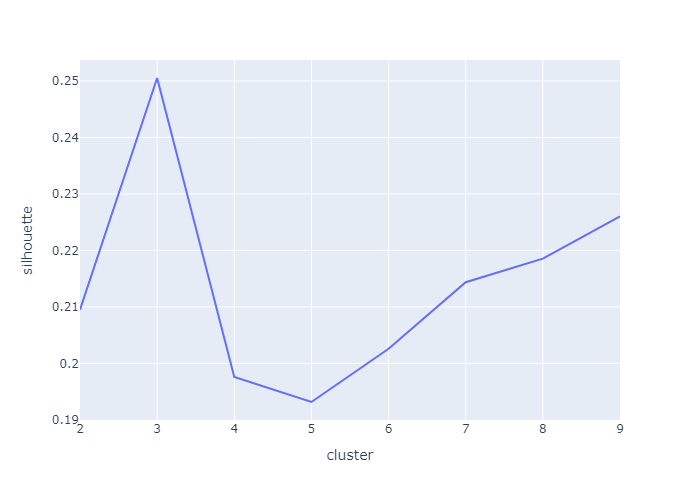

In [7]:
def get_silhouette(cluster_num, X):
    k_means =  cluster.KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42).fit(X)
    silhouette = metrics.silhouette_score(X, k_means.predict(X))
    return silhouette

silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, df_scaled))
    silhouette_res["cluster"].append(cluster_num)

silhouette_df = pd.DataFrame(silhouette_res)

fig = px.line(silhouette_df, x='cluster', y='silhouette')
fig.show('png')

In [8]:
km = cluster.KMeans(n_clusters=3, n_init=10, random_state=42).fit(df_scaled)
predictions = km.predict(df_scaled)
df['cluster'] = predictions
df['cluster'].value_counts()

cluster
0    6118
1    1597
2    1235
Name: count, dtype: int64

In [28]:
db = cluster.DBSCAN().fit(df_scaled)
df['cluster_db'] = db.labels_
df['cluster_db'].value_counts().count()
# -1, потому что один из классов с полностью шумовыми точками обозначается "-1",
# но классом не является

39

In [30]:
silhouette_res = {"silhouette": [], "eps": [], 'min_samples':[]}

for e in np.arange(0.1,3,0.2):
    for ms in range(1,20,4):
        db = cluster.DBSCAN(eps=e, min_samples=ms).fit(df_scaled)
        silhouette_res['silhouette'].append(metrics.silhouette_score(df_scaled, db.labels_))
        silhouette_res['eps'].append(e)
        silhouette_res['min_samples'].append(ms)

In [31]:
df_db = pd.DataFrame(silhouette_res)
df_db.sort_values(by='silhouette')

,silhouette,eps,min_samples
11,-0.443701,0.5,5
16,-0.438837,0.7,5
6,-0.424475,0.3,5
7,-0.404209,0.3,9
30,-0.399305,1.3,1
...,...,...,...
74,0.591924,2.9,17
66,0.592182,2.7,5
73,0.595399,2.9,13
72,0.603811,2.9,9


In [32]:
aggl_dict = {'cluster':[], 'silhouette':[]}
for i in range(3, 10):
    aggl = cluster.AgglomerativeClustering(n_clusters=i).fit(df_scaled)
    aggl_dict['silhouette'].append(metrics.silhouette_score(df_scaled, aggl.labels_))
    aggl_dict['cluster'].append(i)
df_ag = pd.DataFrame(aggl_dict)
df_ag.sort_values(by='silhouette')

,cluster,silhouette
5,8,0.152035
6,9,0.153719
1,4,0.154709
4,7,0.156415
2,5,0.158069
0,3,0.173110
3,6,0.173356


In [33]:
aggl = cluster.AgglomerativeClustering(n_clusters=6).fit(df_scaled)
df['cluster_ag'] = aggl.labels_
df['cluster_ag'].value_counts()

cluster_ag
0    3946
1    2931
2     864
5     722
3     464
4      23
Name: count, dtype: int64

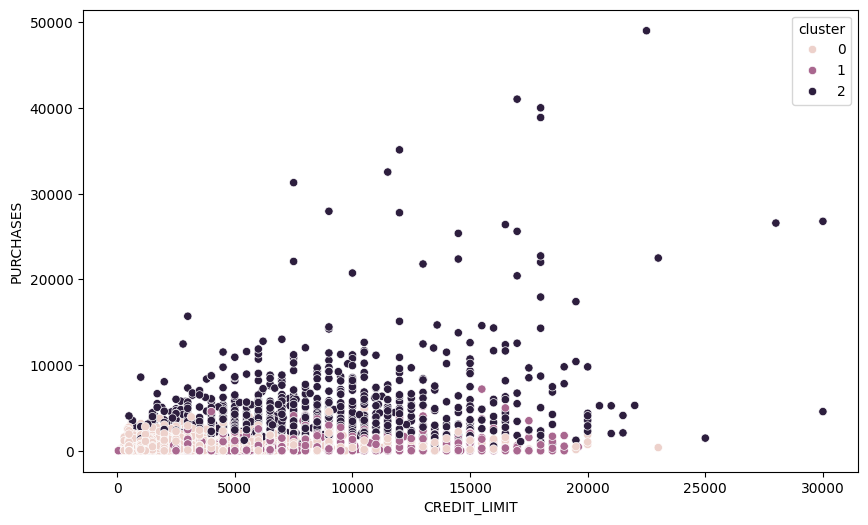

In [41]:
kmeans = cluster.KMeans(n_clusters=3, n_init=10, random_state=42).fit(df_scaled)
df['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show()